In [1]:
#importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


from scipy.stats import skew, kurtosis
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats import zscore



!pip install matplotlib
!pip install catboost==1.2.0 numpy==1.23.5

**data overview**

In [2]:
#loading the dataset and viewing first five rows

df=pd.read_csv('/content/drive/MyDrive/Cs/CW_Dataset_4134124.csv')
df.head(5)

,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,CPn - Screw position at the end of hold pressure,SVo - Shot volume,quality
0,105.97200,81.066,6.968,3.14,74.81,904.800000,921.000000,119.6,107.7,147.6,924.2,8.82,18.75,1.0
1,151.97800,82.035,11.232,2.97,75.64,902.400000,916.000000,113.6,102.2,144.9,887.4,8.83,18.73,4.0
2,106.47372,81.437,6.864,3.82,74.81,885.465392,902.830995,127.3,107.8,146.7,933.1,8.76,18.72,1.0
3,105.90700,81.119,6.240,3.31,75.70,892.600000,913.400000,122.3,106.1,147.3,881.8,8.76,18.81,3.0
4,106.06200,81.403,6.084,2.84,75.64,906.600000,923.000000,118.1,108.4,147.1,895.2,8.96,18.61,4.0


In [3]:
# checking columns,data types, missing values

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Melt temperature                                  1000 non-null   float64
 1   Mold temperature                                  1000 non-null   float64
 2   time_to_fill                                      1000 non-null   float64
 3   ZDx - Plasticizing time                           1000 non-null   float64
 4   ZUx - Cycle time                                  1000 non-null   float64
 5   SKx - Closing force                               1000 non-null   float64
 6   SKs - Clamping force peak value                   1000 non-null   float64
 7   Ms - Torque peak value current cycle              1000 non-null   float64
 8   Mm - Torque mean value current cycle              1000 non-null   float64
 9   APSs - Specific back

In [4]:
#viewing first five rows
print(df.head(5))

   Melt temperature  Mold temperature  time_to_fill  ZDx - Plasticizing time  \
0         105.97200            81.066         6.968                     3.14   
1         151.97800            82.035        11.232                     2.97   
2         106.47372            81.437         6.864                     3.82   
3         105.90700            81.119         6.240                     3.31   
4         106.06200            81.403         6.084                     2.84   

   ZUx - Cycle time  SKx - Closing force  SKs - Clamping force peak value  \
0             74.81           904.800000                       921.000000   
1             75.64           902.400000                       916.000000   
2             74.81           885.465392                       902.830995   
3             75.70           892.600000                       913.400000   
4             75.64           906.600000                       923.000000   

   Ms - Torque peak value current cycle  Mm - Torque mea

In [5]:
#checking the shape of the dataset.

print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print("Number of instances:", df.shape[0])
print("Number of features:", df.shape[1] - 1)  # minus target



Dataset contains 1000 rows and 14 columns.
Number of instances: 1000
Number of features: 13


In [6]:
#checking the data types

print(df.dtypes)


Melt temperature                                    float64
Mold temperature                                    float64
time_to_fill                                        float64
ZDx - Plasticizing time                             float64
ZUx - Cycle time                                    float64
SKx - Closing force                                 float64
SKs - Clamping force peak value                     float64
Ms - Torque peak value current cycle                float64
Mm - Torque mean value current cycle                float64
APSs - Specific back pressure peak value            float64
APVs - Specific injection pressure peak value       float64
CPn - Screw position at the end of hold pressure    float64
SVo - Shot volume                                   float64
quality                                             float64
dtype: object



Target class distribution:
quality
2.0    277
4.0    256
1.0    246
3.0    221
Name: count, dtype: int64


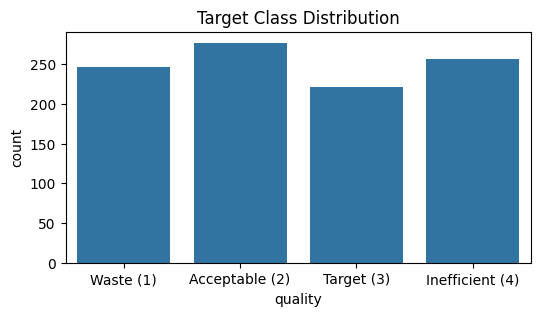

In [7]:
# Target class distribution
print("\nTarget class distribution:")
print(df['quality'].value_counts())


#plotting
plt.figure(figsize=(6,3))
sns.countplot(data=df, x='quality')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Waste (1)', 'Acceptable (2)', 'Target (3)', 'Inefficient (4)'])
plt.title('Target Class Distribution')
plt.show()

In [8]:
#chcking the summary statistics of numerical column
df.describe()

,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,CPn - Screw position at the end of hold pressure,SVo - Shot volume,quality
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,106.903126,81.322086,7.452328,3.238955,75.229060,901.940345,919.352975,116.709900,104.090299,146.213500,900.436700,8.808060,18.756940,2.487000
std,5.417101,0.430818,1.696461,0.357367,0.433644,10.955014,10.558476,4.911665,4.805515,0.772803,25.917722,0.100908,0.098891,1.120306
min,85.441000,78.409000,6.084000,2.780000,74.790000,876.700000,895.200000,94.500000,76.500000,144.800000,780.500000,8.330000,18.510000,1.000000
25%,105.915750,81.100500,6.292000,2.990000,74.820000,893.450000,914.400000,114.200000,103.500000,145.700000,886.400000,8.770000,18.710000,2.000000
50%,106.086000,81.328000,6.968000,3.193600,74.830000,902.200000,918.800000,116.900000,105.150000,146.100000,906.350000,8.820000,18.750000,2.000000
75%,106.262500,81.443500,7.124000,3.290000,75.650000,909.000000,926.300000,120.200000,106.500874,146.700000,918.075000,8.860000,18.790000,4.000000
max,153.953000,82.159000,11.232000,6.610000,75.790000,930.600000,946.500000,128.500000,113.000000,149.600000,937.700000,9.060000,19.230000,4.000000


In [9]:
#numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['Melt temperature', 'Mold temperature', 'time_to_fill',
       'ZDx - Plasticizing time', 'ZUx - Cycle time', 'SKx - Closing force',
       'SKs - Clamping force peak value',
       'Ms - Torque peak value current cycle',
       'Mm - Torque mean value current cycle',
       'APSs - Specific back pressure peak value',
       'APVs - Specific injection pressure peak value',
       'CPn - Screw position at the end of hold pressure', 'SVo - Shot volume',
       'quality'],
      dtype='object')

In [10]:
#detecting imbalanced data(measuring skewness, kurtosis)
desc_stats_skewness = df.drop(columns='quality').apply(skew)
desc_stats_kurtosis= df.drop(columns='quality').apply(kurtosis)

print(f'skenwness: \n{desc_stats_skewness}')
print(f'kurtosis: \n{desc_stats_kurtosis}')





#Skewness > 0 → Right-skewed (long tail on right)
#Skewness < 0 → Left-skewed (long tail on left)

skenwness: 
Melt temperature                                    6.476628
Mold temperature                                   -0.550692
time_to_fill                                        1.561360
ZDx - Plasticizing time                             2.948821
ZUx - Cycle time                                    0.113278
SKx - Closing force                                -0.092554
SKs - Clamping force peak value                    -0.168676
Ms - Torque peak value current cycle               -0.786568
Mm - Torque mean value current cycle               -2.250852
APSs - Specific back pressure peak value            0.811963
APVs - Specific injection pressure peak value      -1.318545
CPn - Screw position at the end of hold pressure   -0.797726
SVo - Shot volume                                   0.833426
dtype: float64
kurtosis: 
Melt temperature                                    45.417838
Mold temperature                                     3.763722
time_to_fill                                 

**Data cleaning**

In [11]:
# Count missing values per column
print(df.isnull().sum())


Melt temperature                                    0
Mold temperature                                    0
time_to_fill                                        0
ZDx - Plasticizing time                             0
ZUx - Cycle time                                    0
SKx - Closing force                                 0
SKs - Clamping force peak value                     0
Ms - Torque peak value current cycle                0
Mm - Torque mean value current cycle                0
APSs - Specific back pressure peak value            0
APVs - Specific injection pressure peak value       0
CPn - Screw position at the end of hold pressure    0
SVo - Shot volume                                   0
quality                                             0
dtype: int64


In [12]:
#checking unique values
print(f"Unique values:\n{df.nunique()}")

Unique values:
Melt temperature                                    600
Mold temperature                                    535
time_to_fill                                         29
ZDx - Plasticizing time                             190
ZUx - Cycle time                                     30
SKx - Closing force                                 318
SKs - Clamping force peak value                     220
Ms - Torque peak value current cycle                 90
Mm - Torque mean value current cycle                204
APSs - Specific back pressure peak value             41
APVs - Specific injection pressure peak value       478
CPn - Screw position at the end of hold pressure     61
SVo - Shot volume                                    61
quality                                               4
dtype: int64


In [13]:
#checking the duplicate rows in the dataset
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [14]:
#counting the outliers
col_outlier=[]


def count_outliers_iqr(data):

    outlier_counts = {}
    for col in data.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outliers = ((df[col] < lower_bound)
                    | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers

        if outliers>0:
          col_outlier.append(col)
    return outlier_counts



# Get outlier counts
outlier_counts = count_outliers_iqr(df)

print("Outlier count per column (IQR Method)\n")
for columns, count in outlier_counts.items():
    print(f"{columns}: {count}")

Outlier count per column (IQR Method)

Melt temperature: 53
Mold temperature: 188
time_to_fill: 172
ZDx - Plasticizing time: 92
ZUx - Cycle time: 0
SKx - Closing force: 0
SKs - Clamping force peak value: 25
Ms - Torque peak value current cycle: 40
Mm - Torque mean value current cycle: 102
APSs - Specific back pressure peak value: 12
APVs - Specific injection pressure peak value: 47
CPn - Screw position at the end of hold pressure: 105
SVo - Shot volume: 116
quality: 0


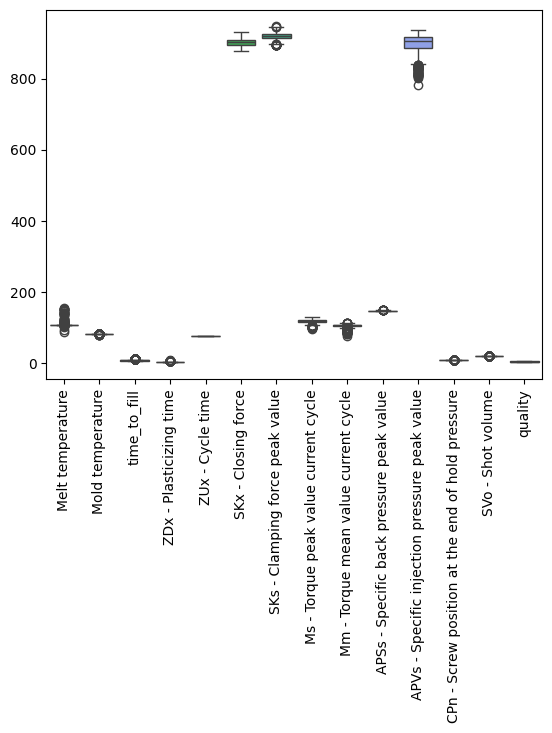

In [15]:
#visualizing the outliers in the dataset
plt.figsize=(10,5)
sns.boxplot(df.select_dtypes(include=['number']))
plt.xticks(rotation=90)
plt.show()

In [16]:
# Creating a copy of the dataset to avoid modifying the original
data= df.copy()

# Removing or replacing outliers
for col in col_outlier:

    # Calculate IQR and bounds
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # If outliers number is low (<= 30), remove them
    if outlier_counts[col] <= 30:
        data= data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
        print(f"Outliers removed for {col}. Number of rows after removal: {data.shape[0]}")

    # If outliers are too many, replace them
    #based on the skewness

    else:
        skewness = abs(data[col].skew())  # Get skewness of the column

        if skewness >0.55:  # Skewed data →replacing by Median
            median_value = data[col].median()
            data[col] = data[col].apply(lambda x: median_value
                                                        if x < lower_bound or
                                                        x > upper_bound
                                                        else x)

        else:  # Normal distribution → replacing by Mean
            mean_value = data[col].mean()
            data[col] = data[col].apply(lambda x: mean_value
                                                        if x < lower_bound or
                                                        x > upper_bound
                                                        else x)


Outliers removed for SKs - Clamping force peak value. Number of rows after removal: 975
Outliers removed for APSs - Specific back pressure peak value. Number of rows after removal: 963


In [17]:
data.shape #shape after outliers removal

(963, 14)

**feature engineering**

In [18]:
#new features have been added that could potentially increase predictive power


In [19]:

data['Pressure_Efficiency'] = data['APVs - Specific injection pressure peak value'] / data['SKx - Closing force']
data['Torque_Efficiency'] = data['Ms - Torque peak value current cycle'] / data['Mm - Torque mean value current cycle']
data['Filling_Speed'] = data['SVo - Shot volume'] / data['time_to_fill']
data['Thermal_Delta'] = data['Melt temperature'] - data['Mold temperature']


In [20]:
#no constant valued features
#no low variance containing features
data.shape

(963, 18)

In [21]:
#analyzing corelation
correlation_matrix = data.corr()
correlation_matrix


,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,CPn - Screw position at the end of hold pressure,SVo - Shot volume,quality,Pressure_Efficiency,Torque_Efficiency,Filling_Speed,Thermal_Delta
Melt temperature,1.000000,0.367787,0.354192,-0.215748,-0.349482,0.156271,0.016768,0.110341,-0.088635,-0.136924,0.264400,0.180550,-0.190619,-0.126317,0.166005,0.172863,-0.363393,0.596294
Mold temperature,0.367787,1.000000,0.026389,-0.419115,0.117209,-0.044467,-0.118042,-0.003658,-0.124346,-0.197295,-0.053170,0.227161,-0.209019,0.281096,-0.026354,0.067544,-0.035624,-0.527191
time_to_fill,0.354192,0.026389,1.000000,-0.090963,-0.668017,0.317313,0.250288,0.042122,-0.126762,0.001956,0.350767,0.124997,-0.150526,-0.449499,0.163448,0.122078,-0.997359,0.300878
ZDx - Plasticizing time,-0.215748,-0.419115,-0.090963,1.000000,-0.255134,-0.142553,-0.015596,-0.069256,-0.162601,0.257773,-0.070568,-0.641671,0.590856,-0.506971,0.010598,0.020811,0.114537,0.164662
ZUx - Cycle time,-0.349482,0.117209,-0.668017,-0.255134,1.000000,-0.344691,-0.291531,-0.140123,-0.023099,-0.142750,-0.615356,0.010990,0.016610,0.857173,-0.397872,-0.140819,0.671069,-0.420538
SKx - Closing force,0.156271,-0.044467,0.317313,-0.142553,-0.344691,1.000000,0.679016,-0.005745,0.006674,-0.092337,0.165504,0.238972,-0.230603,-0.082038,-0.378576,-0.008526,-0.322050,0.181187
SKs - Clamping force peak value,0.016768,-0.118042,0.250288,-0.015596,-0.291531,0.679016,1.000000,-0.025278,0.019639,-0.038696,0.100113,0.155251,-0.121375,-0.096082,-0.267618,-0.037191,-0.246902,0.117225
Ms - Torque peak value current cycle,0.110341,-0.003658,0.042122,-0.069256,-0.140123,-0.005745,-0.025278,1.000000,0.425792,-0.050175,0.218447,0.081030,-0.101735,-0.151826,0.207717,0.845318,-0.041264,0.103987
Mm - Torque mean value current cycle,-0.088635,-0.124346,-0.126762,-0.162601,-0.023099,0.006674,0.019639,0.425792,1.000000,0.034047,0.312523,0.259958,-0.222353,-0.092305,0.288503,-0.123273,0.128768,0.026351
APSs - Specific back pressure peak value,-0.136924,-0.197295,0.001956,0.257773,-0.142750,-0.092337,-0.038696,-0.050175,0.034047,1.000000,0.029698,-0.199229,0.193688,-0.261361,0.078181,-0.075033,0.004798,0.045199


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

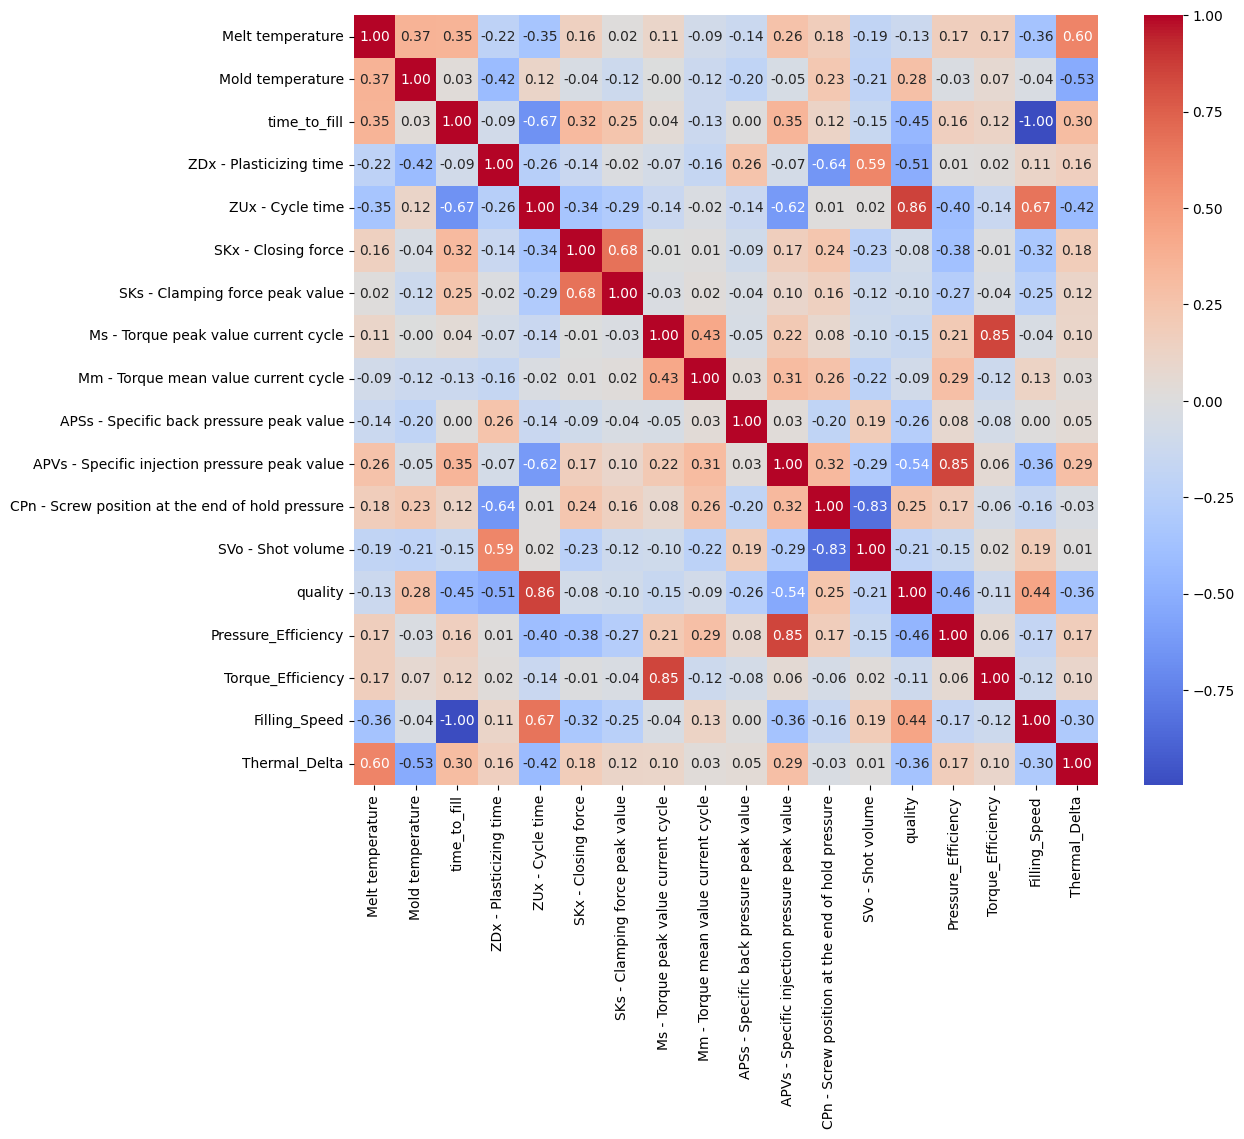

In [22]:
#viasualising the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt

In [23]:
#extracting upper triangle of the corelation
upper_tri=correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))

#detecting highly corelated features
high_corr_features=[col for col in upper_tri.columns if any(upper_tri[col]>0.9)]

print(f"Number of highly correlated features: {len(high_corr_features)}")

Number of highly correlated features: 0


In [24]:
#based on the domain knowledge it seems likely all the features are important.

#**data visualization**

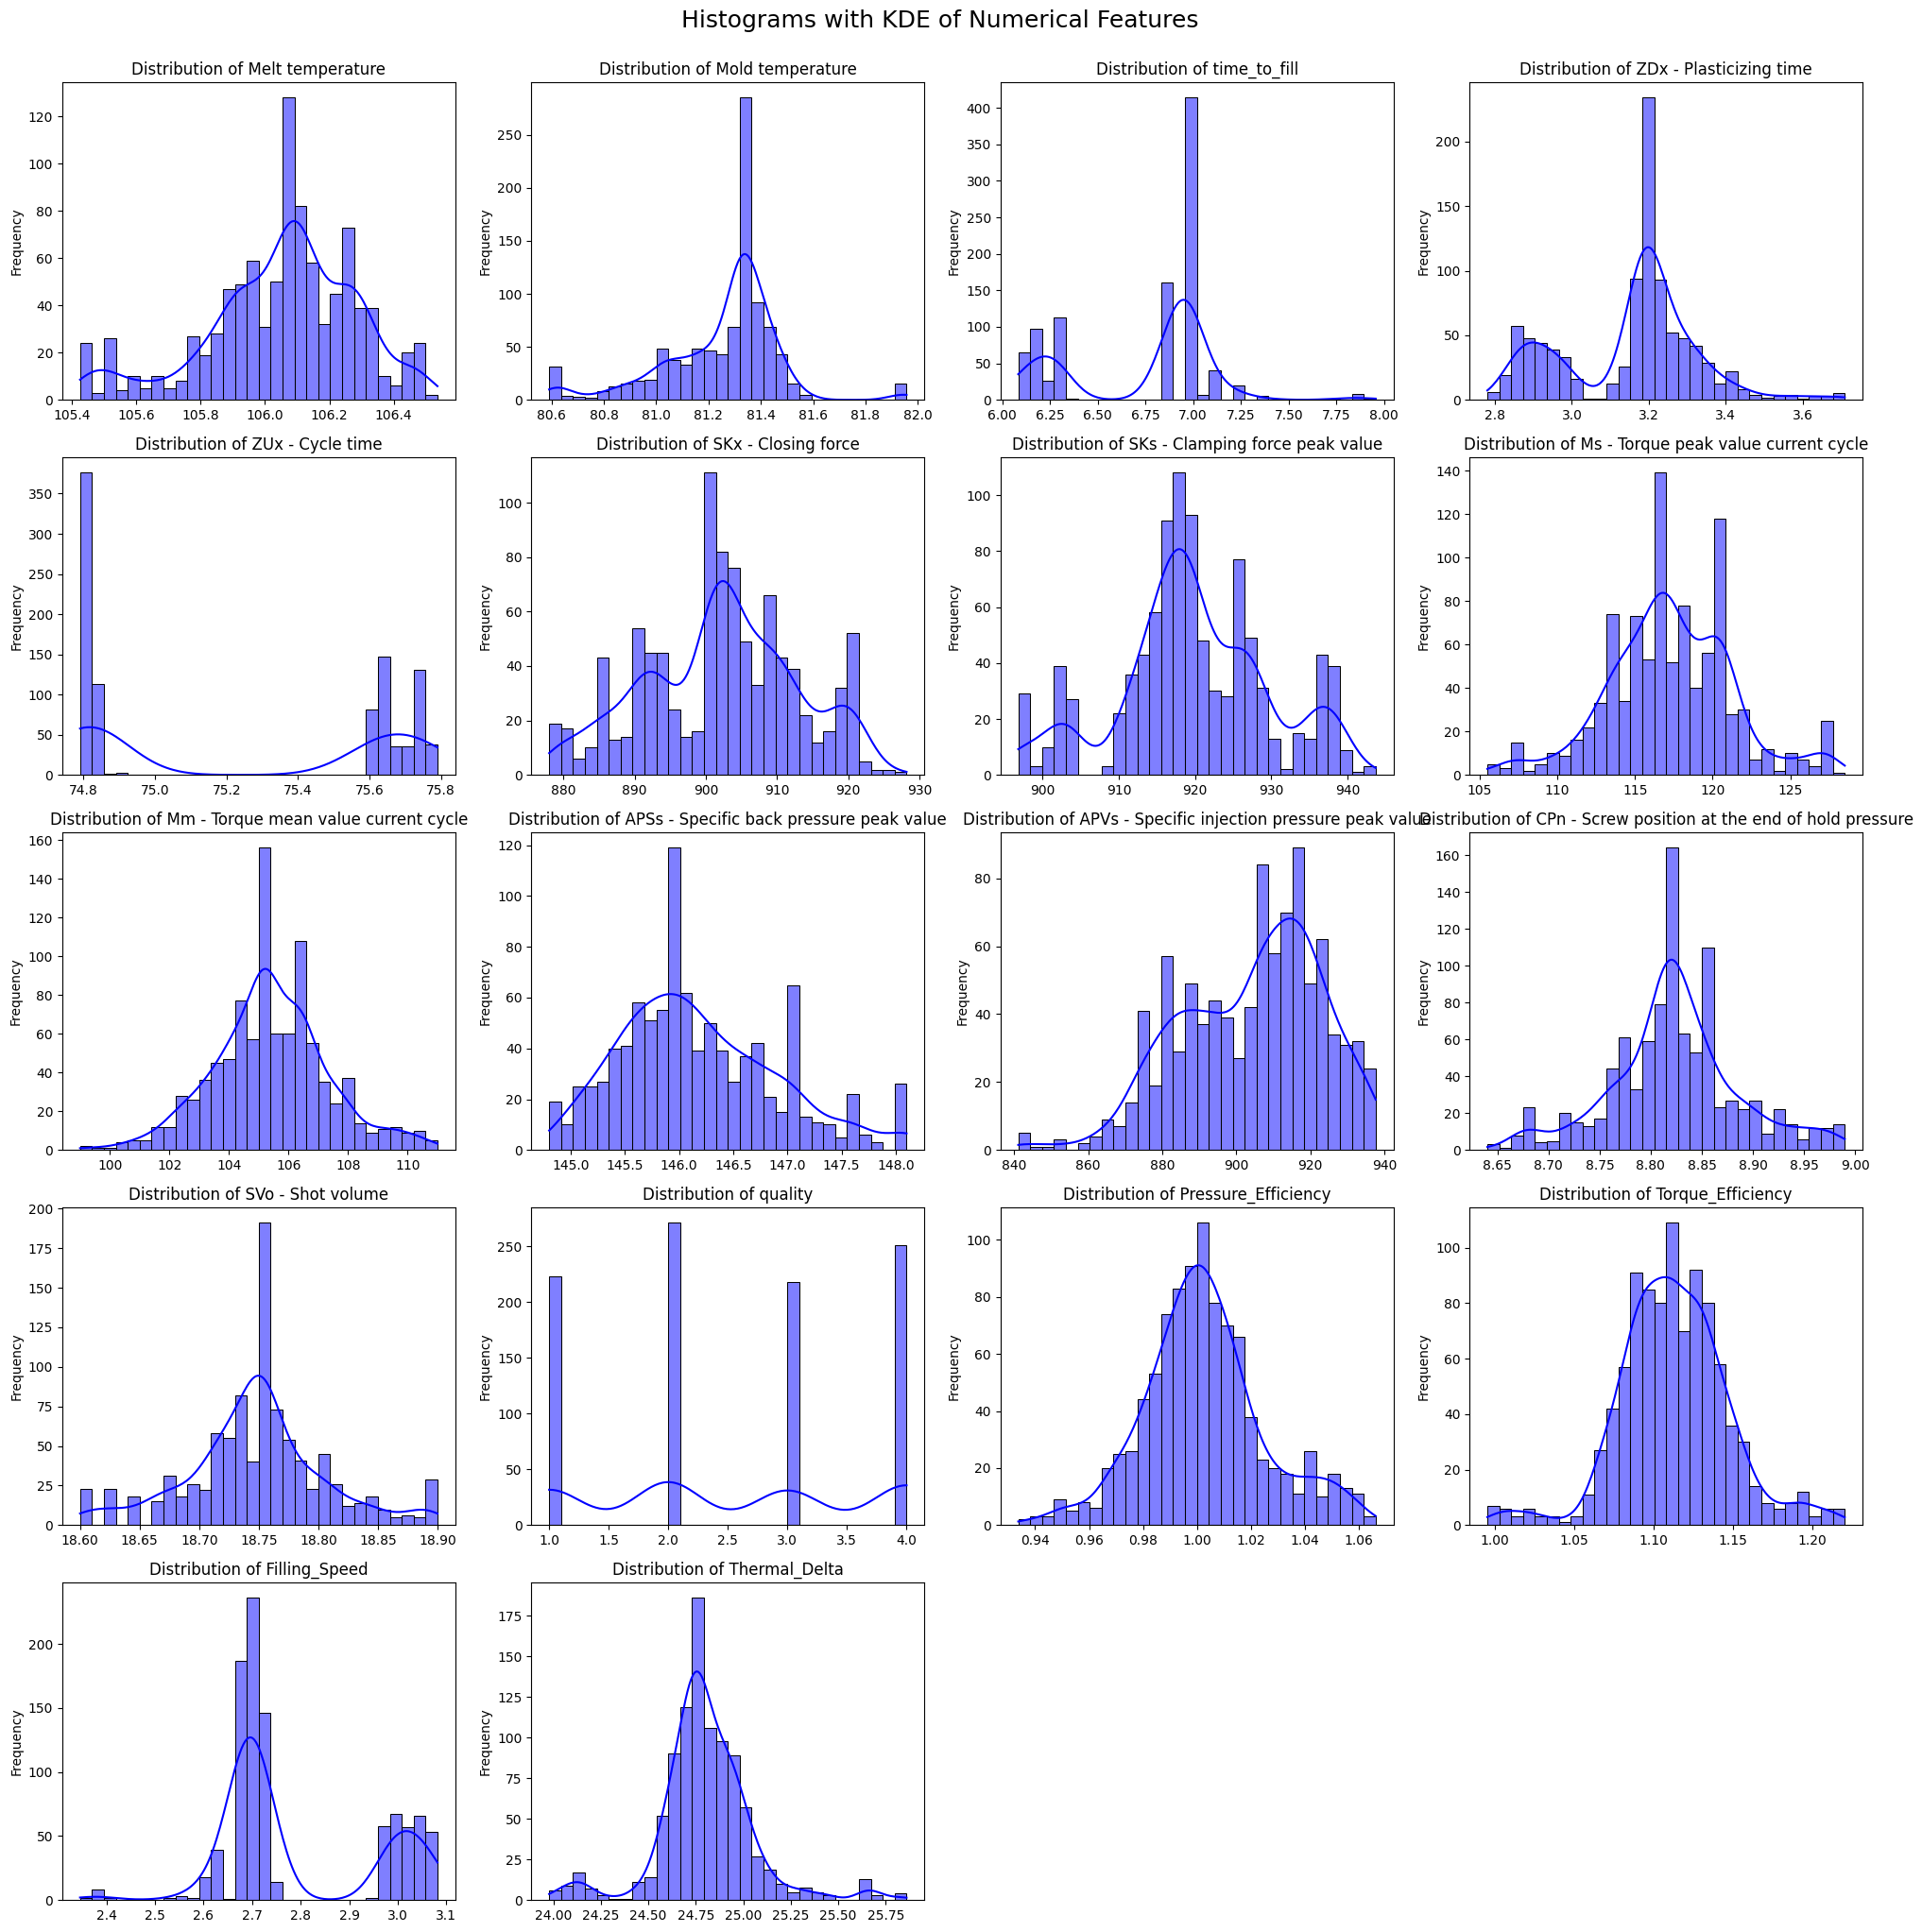

In [25]:

# Select numeric columns
numeric_cols = data.select_dtypes(include='number').columns
n_cols = len(numeric_cols)

# Define subplot grid dimensions
n_cols_subplot = 4  # Number of plots per row
n_rows_subplot = int(np.ceil(n_cols / n_cols_subplot))  # Calculate required number of rows

# Create subplots grid
fig, axes = plt.subplots(n_rows_subplot, n_cols_subplot, figsize=(20, n_rows_subplot * 4))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot histograms with KDE for each numeric feature
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, bins=30, ax=axes[i], color='blue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Turn off unused subplots (if any exist)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.suptitle("Histograms with KDE of Numerical Features", fontsize=18, y=1.02)
plt.show()


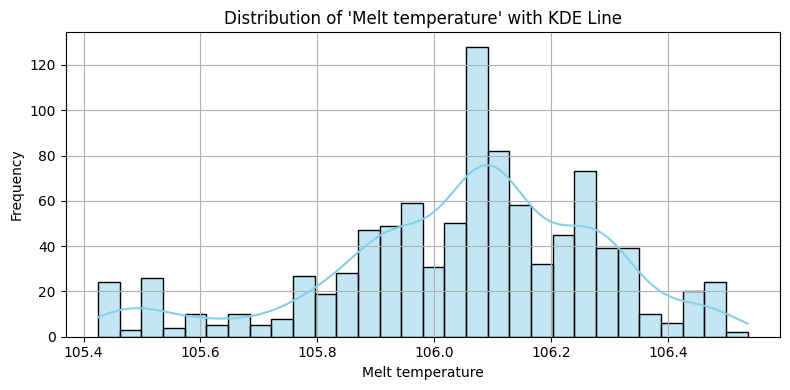

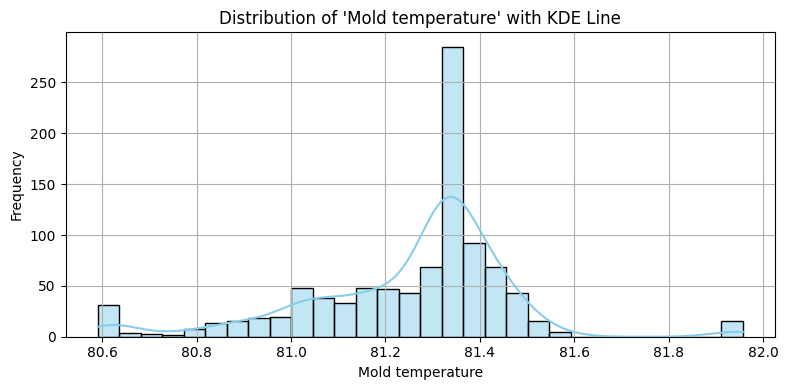

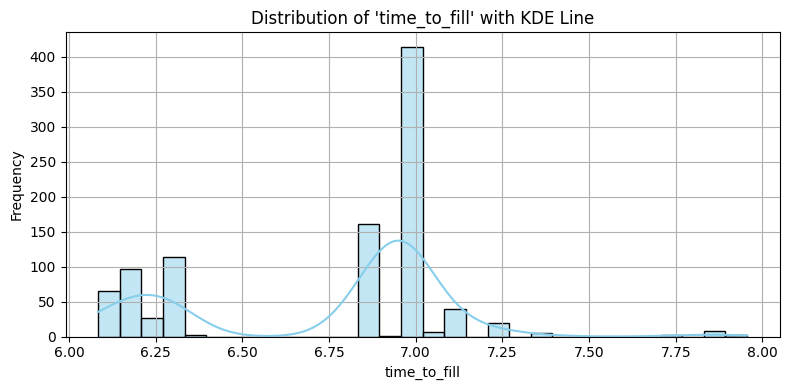

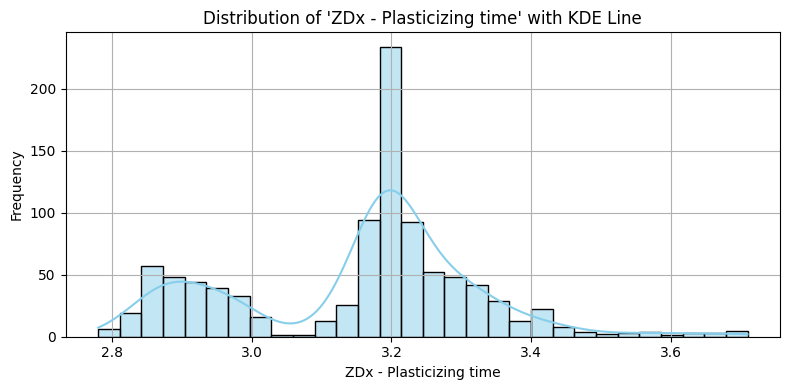

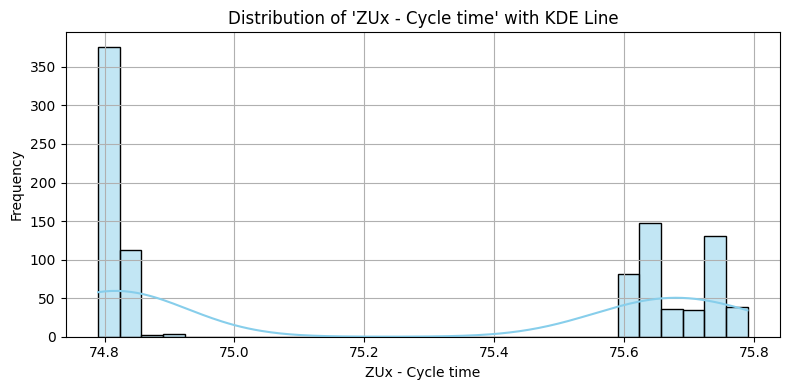

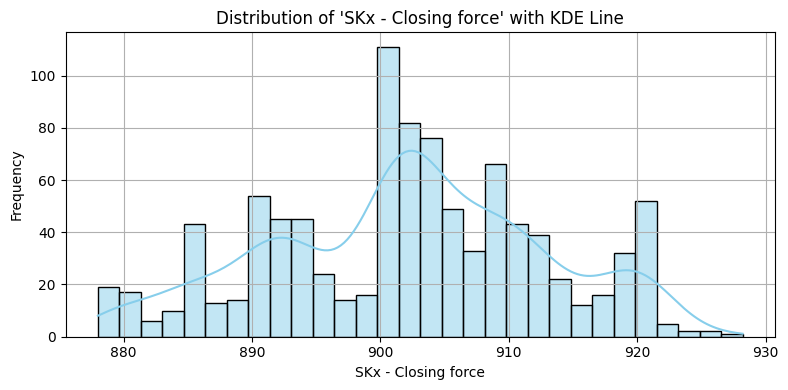

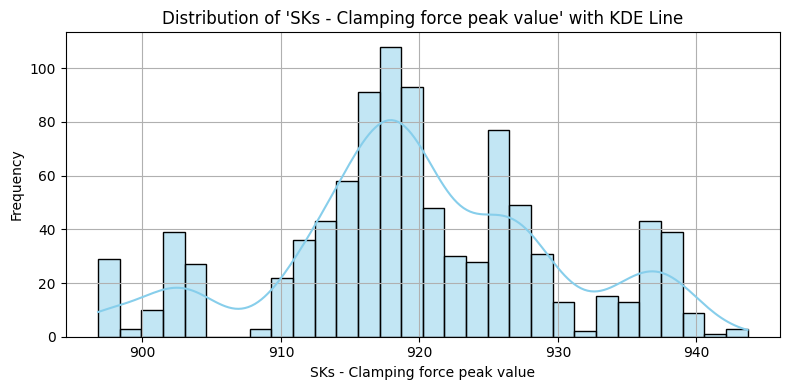

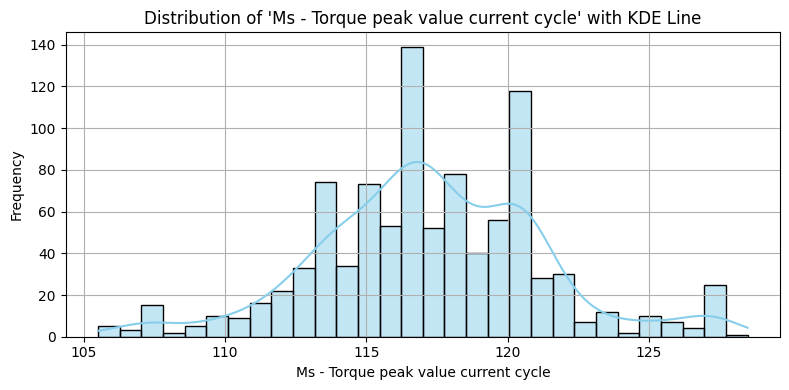

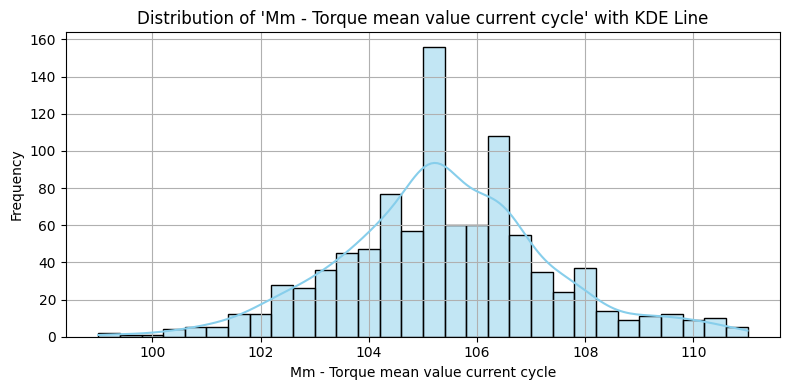

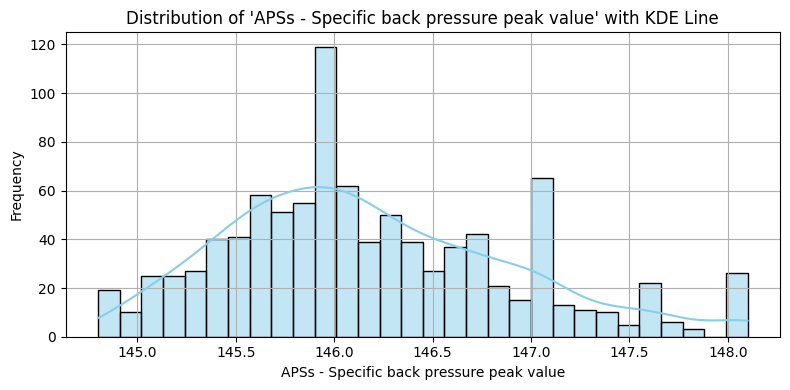

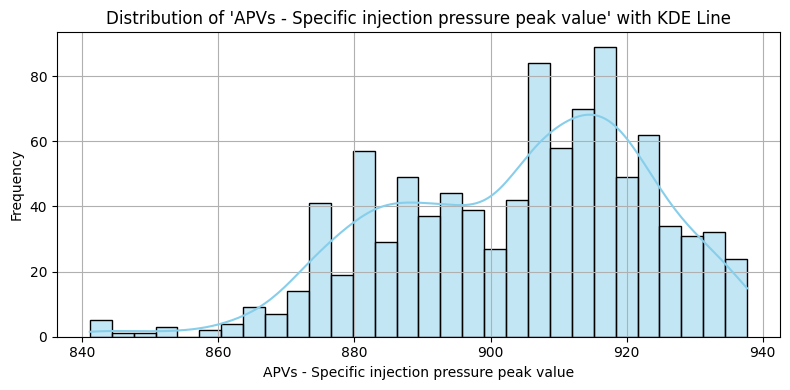

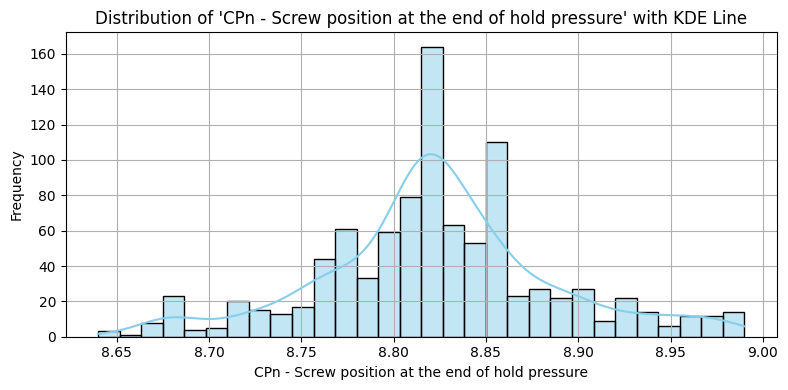

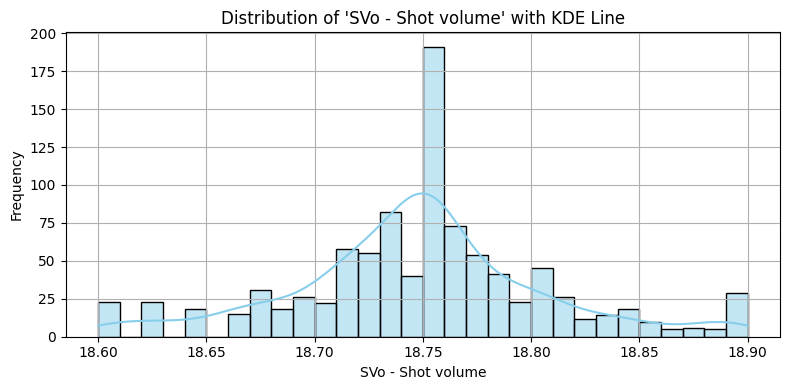

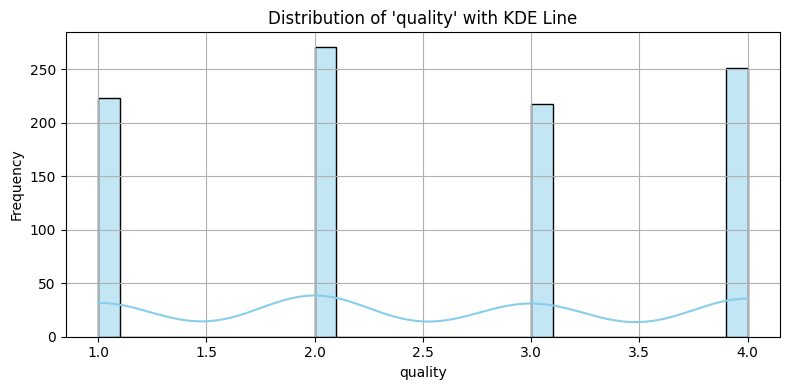

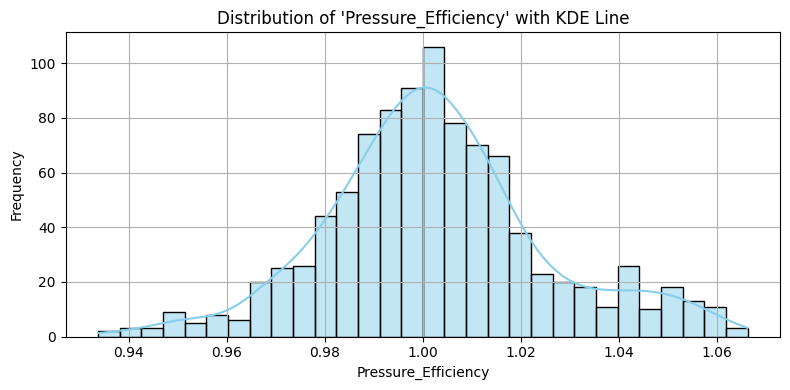

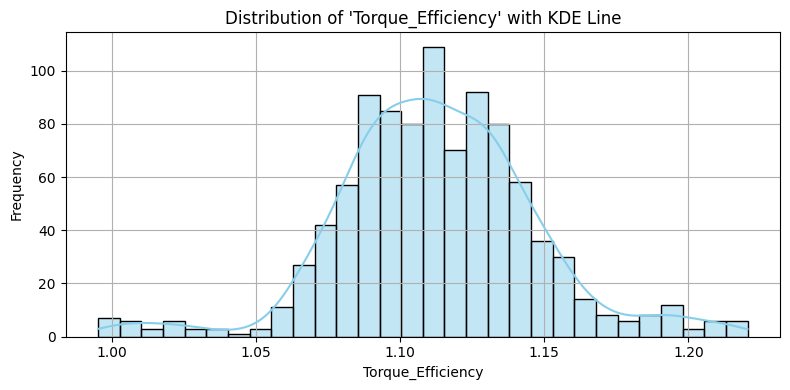

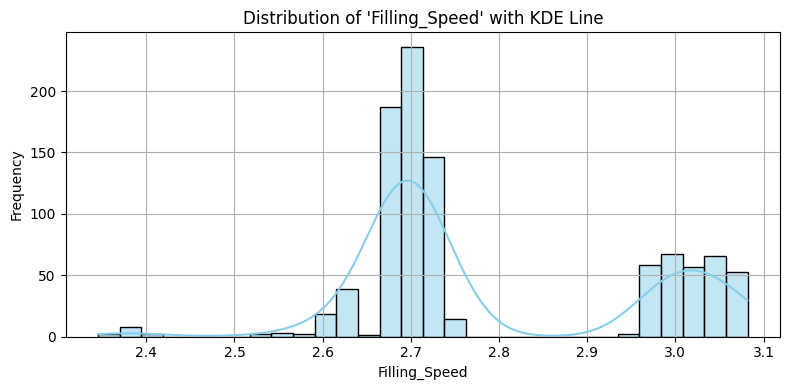

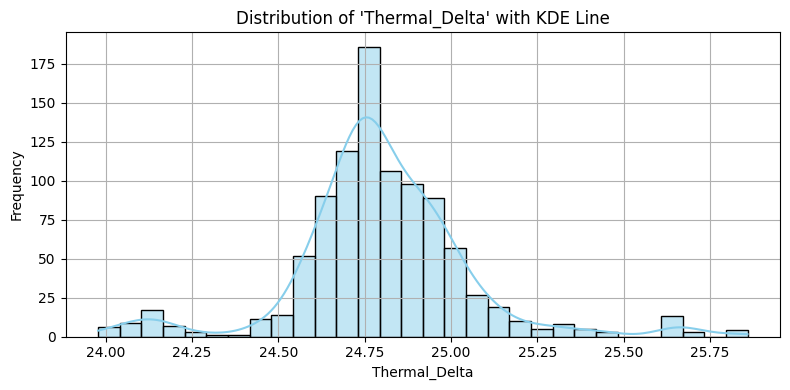

In [26]:

numeric_cols = data.select_dtypes(include='number').columns

# Plot each numerical feature with KDE overlay
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of '{col}' with KDE Line")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


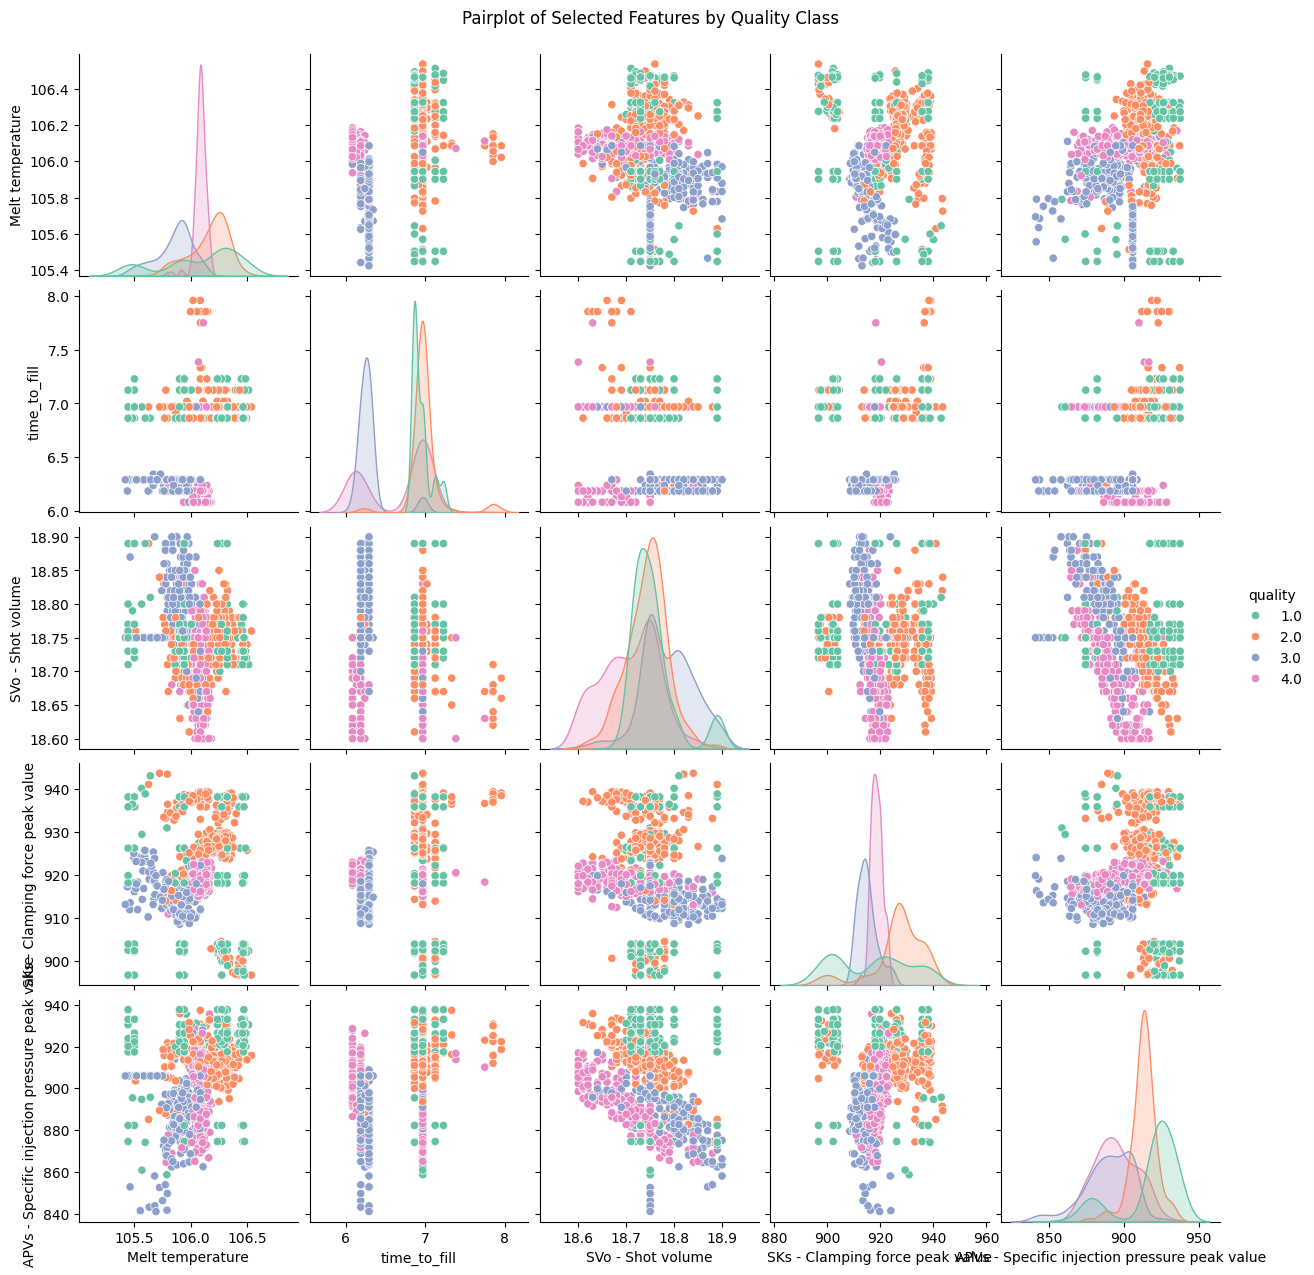

In [27]:

# Select a few relevant features (too many will make the plot unreadable)
selected_features = [
    'Melt temperature',
    'time_to_fill',
    'SVo - Shot volume',
    'SKs - Clamping force peak value',
    'APVs - Specific injection pressure peak value',
    'quality'  # must include target
]

# Create a pairplot with hue set to quality class
sns.pairplot(data[selected_features], hue='quality', diag_kind='kde', palette='Set2')
plt.suptitle("Pairplot of Selected Features by Quality Class", y=1.02)
plt.show()


**Data preparation and analysis**

In [28]:
#no missing values
#no duplicate rows
#not necessary to change the data types
#handled outliers
#no need to encode any variable as all of them numerical target variable
#need to normalize numerical feathures
#splitting the dataset
#applying cross validation folds


In [29]:
#separating features and target variables
X=data.drop(columns=['quality'])
y=data['quality']

In [30]:
#anova test for feature selection
anova_results={}

for feature in X.columns:
  f_stat,p_value=stats.f_oneway(
      *[X[feature][y==cls]for cls in y.unique()]
  )
  anova_results[feature]=(f_stat,p_value)

# Convert results to DataFrame
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['F-Statistic', 'p-Value'])

# Sort by significance
anova_df = anova_df.sort_values(by='p-Value')
anova_df

,F-Statistic,p-Value
ZUx - Cycle time,6791.428572,0.000000e+00
ZDx - Plasticizing time,624.702168,5.316754e-225
Filling_Speed,360.640180,9.466347e-157
time_to_fill,339.988588,2.452184e-150
APVs - Specific injection pressure peak value,194.194905,2.159149e-98
SKx - Closing force,138.482890,1.526922e-74
CPn - Screw position at the end of hold pressure,115.831966,5.188757e-64
Pressure_Efficiency,101.447335,4.878197e-57
SVo - Shot volume,96.252089,1.839439e-54
Melt temperature,94.255081,1.834378e-53


In [31]:
# Select only significant features (p-value < 0.05)
significant_features = anova_df[anova_df["p-Value"] < 0.05].index.tolist()

# Create a new dataset with only significant features
X_selected = data[significant_features]
y= data["quality"]  # Keeping target variable unchanged

print(f"Selected {len(significant_features)} important features out of {data.shape[1] - 1}.")


Selected 17 important features out of 17.


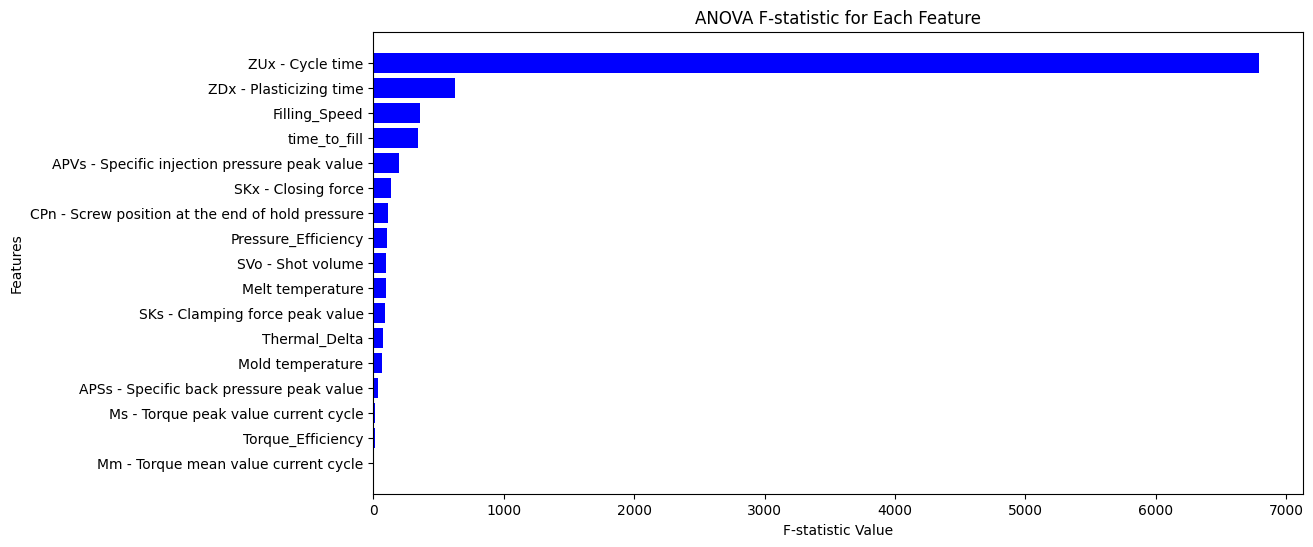

In [32]:
# Sorting the ANOVA results by F-statistic for better visualization
anova_dff = anova_df.sort_values(by="F-Statistic", ascending=False).dropna()

# Plot the F-statistic values
plt.figure(figsize=(12, 6))
plt.barh(anova_dff.index, anova_dff["F-Statistic"], color="blue")
plt.xlabel("F-statistic Value")
plt.ylabel("Features")
plt.title("ANOVA F-statistic for Each Feature")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

Text(0.5, 1.0, 'Cycle Time vs Quality Class')

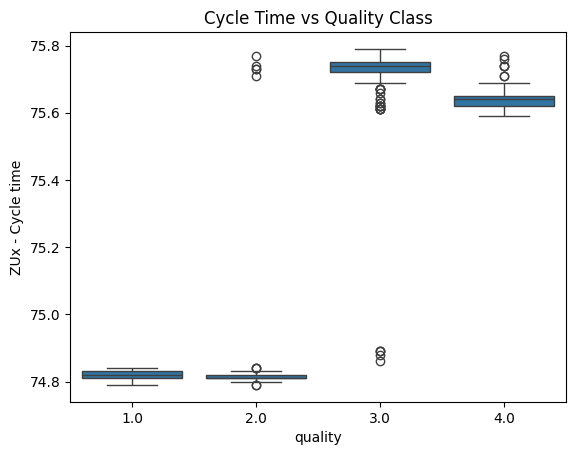

In [33]:
sns.boxplot(x='quality', y='ZUx - Cycle time', data=data)
plt.title('Cycle Time vs Quality Class')


In [34]:
#further analysiation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold # Import VarianceThreshold

var_thresh = VarianceThreshold(threshold=0.01)
X_low_var_filtered = var_thresh.fit_transform(data)
kept_columns = data.columns[var_thresh.get_support()]


vif_data = pd.DataFrame()
vif_data["Feature"] = kept_columns
vif_data["VIF"] = [variance_inflation_factor(X_low_var_filtered, i) for i in range(X_low_var_filtered.shape[1])]
vif_data = vif_data.sort_values(by="VIF", ascending=False)

vif_data

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,Melt temperature,inf
1,Mold temperature,inf
13,Thermal_Delta,inf
4,ZUx - Cycle time,1.745744e+05
2,time_to_fill,6.409277e+04
12,Filling_Speed,6.398623e+04
9,APSs - Specific back pressure peak value,4.356419e+04
6,SKs - Clamping force peak value,1.652962e+04
5,SKx - Closing force,1.498861e+04
8,Mm - Torque mean value current cycle,4.874719e+03


In [35]:
selected_features = [
    'ZUx - Cycle time',                # Strongest overall indicator
    'ZDx - Plasticizing time',         # High correlation, low VIF
    'CPn - Screw position at the end of hold pressure',  # Moderate correlation, low VIF
    'SVo - Shot volume',               # Moderate correlation, low VIF
    'Torque_Efficiency',              # Engineered, may add useful signal
    'Filling_Speed'                   # Engineered, time-volume balance
]

# **normalization and splitting the dataset**

In [36]:
# Prepare final datasets
X_final = data[selected_features]
y_final = data['quality']


In [37]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.3, random_state=42, stratify=y_final
)

In [38]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output shapes
final_shapes = {
    "Selected Features": selected_features,
    "X_train shape": X_train_scaled.shape,
    "X_test shape": X_test_scaled.shape,
    "y_train shape": y_train.shape,
    "y_test shape": y_test.shape
}

final_shapes

{'Selected Features': ['ZUx - Cycle time',
  'ZDx - Plasticizing time',
  'CPn - Screw position at the end of hold pressure',
  'SVo - Shot volume',
  'Torque_Efficiency',
  'Filling_Speed'],
 'X_train shape': (674, 6),
 'X_test shape': (289, 6),
 'y_train shape': (674,),
 'y_test shape': (289,)}

In [39]:
#normalisation is basically a method to ensure
#that all the fetures have same scale and to prevent ceratin features
#to prevent dominating the learning process

**model development**

In [40]:
# 🔧 Step 1: Install/Upgrade Required Libraries

!pip install --upgrade numpy --quiet  # Upgrade numpy first
!pip install --upgrade catboost scikit-learn pandas matplotlib seaborn --quiet

# 🔍 Step 2: Import Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats import zscore


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [41]:
#installing catboost environment
!pip install catboost==1.2.0 numpy==1.23.5


  Using cached catboost-1.2-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached catboost-1.2-cp311-cp311-manylinux2014_x86_64.whl (98.5 MB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: catboost
    Found existing installation: catboost 1.2.7
    Uninstalling catboost-1.2.7:
      Successfully uninstalled catboost-1.2.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.23.5 which

In [42]:
#Defining  Models with default parameters.
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'ANN': MLPClassifier(random_state=42, max_iter=500)
}

In [43]:
#Training and Evaluating each models.
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] =pd.DataFrame(report).transpose()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
# displaying the result
for name,result in results.items():
  print(f'\n classification report for {name}:\n')
  print(result)


 classification report for Random Forest:

              precision    recall  f1-score     support
1.0            0.819672  0.746269  0.781250   67.000000
2.0            0.802326  0.851852  0.826347   81.000000
3.0            0.939394  0.939394  0.939394   66.000000
4.0            0.947368  0.960000  0.953642   75.000000
accuracy       0.875433  0.875433  0.875433    0.875433
macro avg      0.877190  0.874379  0.875158  289.000000
weighted avg   0.875291  0.875433  0.874744  289.000000

 classification report for KNN:

              precision    recall  f1-score     support
1.0            0.818182  0.671642  0.737705   67.000000
2.0            0.763441  0.876543  0.816092   81.000000
3.0            0.938462  0.924242  0.931298   66.000000
4.0            0.947368  0.960000  0.953642   75.000000
accuracy       0.861592  0.861592  0.861592    0.861592
macro avg      0.866863  0.858107  0.859684  289.000000
weighted avg   0.863834  0.861592  0.859926  289.000000

 classification report fo

In [45]:
#cross validation

from sklearn.model_selection import cross_val_score

cv_scores = {}

for name, model in models.items():
    score = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()
    cv_scores[name] = round(score, 4)

# Create CV score table
cv_df = pd.DataFrame.from_dict(cv_scores, orient='index', columns=['10-Fold CV Accuracy'])
cv_df = cv_df.sort_values(by='10-Fold CV Accuracy', ascending=False)
cv_df


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,10-Fold CV Accuracy
Random Forest,0.9080
CatBoost,0.9050
ANN,0.8768
KNN,0.8397
SVM,0.8308


In [46]:
# 🤖 Step 8: Defining Models with default parameters.
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'ANN': MLPClassifier(random_state=42, max_iter=500)
}

# 🚀 Step 9: Training and Evaluating each models.
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] =pd.DataFrame(report).transpose()

# displaying the result
for name, result in results.items(): # Fixed: Changed 'models' to 'name'
  print(f'\n classification report for {name}:\n') # Fixed: Use 'name' here as well
  print(result)

#cross validation
from sklearn.model_selection import cross_val_score

cv_scores = {}

# Re-define models here so it's not a string anymore
models = { # This redefines models to the original model dictionary
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42),
    'ANN': MLPClassifier(random_state=42, max_iter=500)
}

for name, model in models.items():
    score = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy').mean()
    cv_scores[name] = round(score, 4)

# Create CV score table
cv_df = pd.DataFrame.from_dict(cv_scores, orient='index', columns=['10-Fold CV Accuracy'])
cv_df = cv_df.sort_values(by='10-Fold CV Accuracy', ascending=False)
cv_df

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



 classification report for Random Forest:

              precision    recall  f1-score     support
1.0            0.819672  0.746269  0.781250   67.000000
2.0            0.802326  0.851852  0.826347   81.000000
3.0            0.939394  0.939394  0.939394   66.000000
4.0            0.947368  0.960000  0.953642   75.000000
accuracy       0.875433  0.875433  0.875433    0.875433
macro avg      0.877190  0.874379  0.875158  289.000000
weighted avg   0.875291  0.875433  0.874744  289.000000

 classification report for KNN:

              precision    recall  f1-score     support
1.0            0.818182  0.671642  0.737705   67.000000
2.0            0.763441  0.876543  0.816092   81.000000
3.0            0.938462  0.924242  0.931298   66.000000
4.0            0.947368  0.960000  0.953642   75.000000
accuracy       0.861592  0.861592  0.861592    0.861592
macro avg      0.866863  0.858107  0.859684  289.000000
weighted avg   0.863834  0.861592  0.859926  289.000000

 classification report fo

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,10-Fold CV Accuracy
Random Forest,0.9080
CatBoost,0.9050
ANN,0.8768
KNN,0.8397
SVM,0.8308


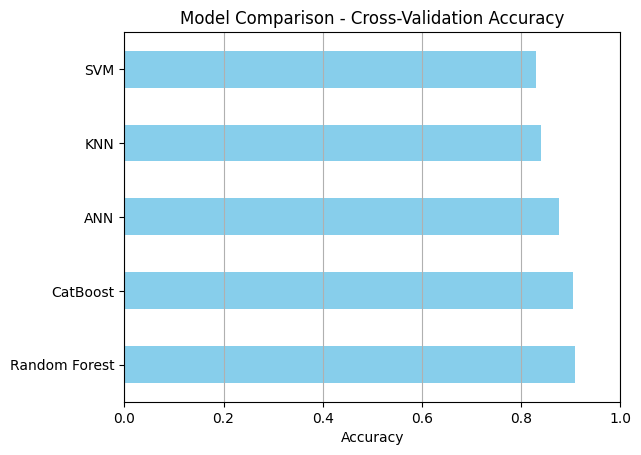

In [47]:
#Bar plot of model accuracy
cv_df.plot(kind='barh', legend=False, color='skyblue')
plt.title("Model Comparison - Cross-Validation Accuracy")
plt.xlabel("Accuracy")
plt.xlim(0, 1)
plt.grid(axis='x')
plt.show()

In [48]:
#hyperparameter tuning with GridSearchCv
#Defining  hyperparameter grids for each model
tuning_configs = {
    "Random Forest": {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10],
            'min_samples_split': [2, 5]
        }
    },
    "SVM": {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [1, 10],
            'kernel': ['rbf', 'linear']
        }
    },
    "KNN": {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    "ANN": {
        'model': MLPClassifier(max_iter=500, random_state=42),
        'params': {
            'hidden_layer_sizes': [(50,), (100,)],
            'activation': ['relu', 'tanh']
        }
    },
    "CatBoost": {
        'model': CatBoostClassifier(verbose=0, random_state=42),
        'params': {
            'depth': [4, 6],
            'learning_rate': [0.03, 0.1],
            'iterations': [100, 200]
        }
    }
}


🔍 Tuning Random Forest...
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Cross-Validation Accuracy: 0.9154


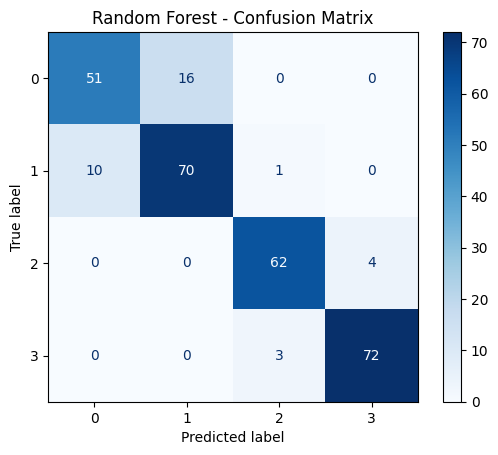


🔍 Tuning SVM...
Best Parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Cross-Validation Accuracy: 0.8678


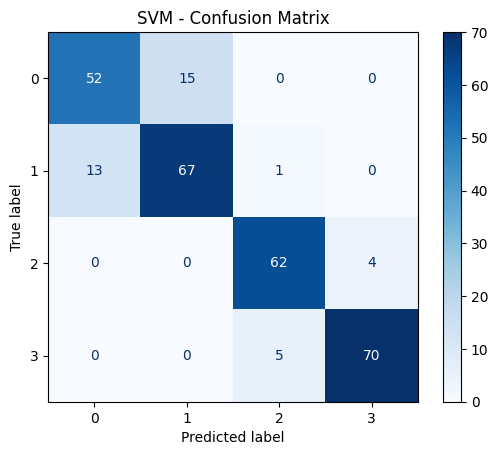


🔍 Tuning KNN...
Best Parameters for KNN: {'n_neighbors': 3, 'weights': 'uniform'}
Cross-Validation Accuracy: 0.8619


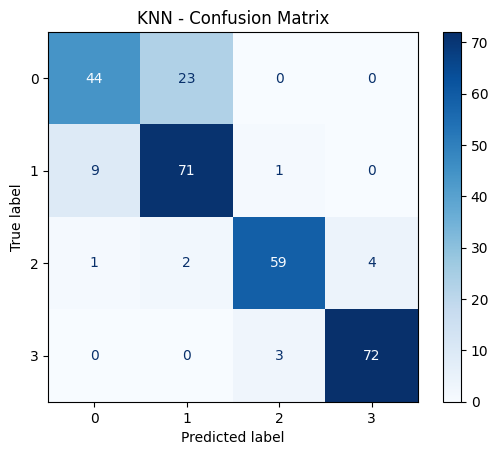


🔍 Tuning ANN...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Parameters for ANN: {'activation': 'relu', 'hidden_layer_sizes': (100,)}
Cross-Validation Accuracy: 0.8768


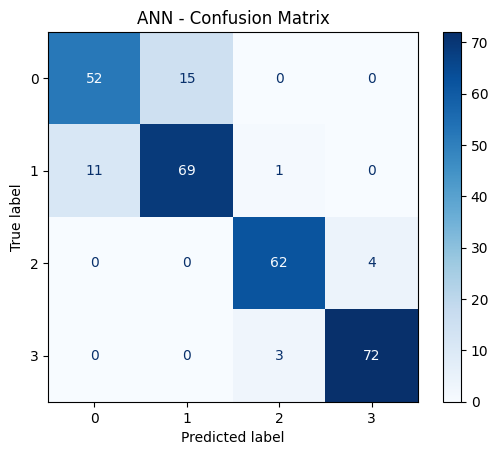


🔍 Tuning CatBoost...
Best Parameters for CatBoost: {'depth': 4, 'iterations': 200, 'learning_rate': 0.1}
Cross-Validation Accuracy: 0.9035


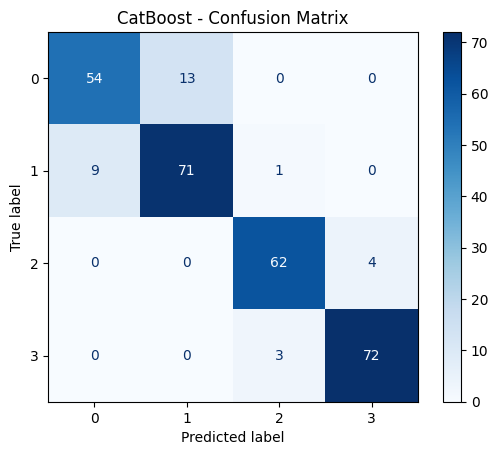

In [49]:
# Running GridSearchCV for all models and evaluate
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
best_models = {}
for name, config in tuning_configs.items():
    print(f"\n🔍 Tuning {name}...")
    grid = GridSearchCV(estimator=config['model'], param_grid=config['params'], cv=10, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    best_models[name] = {
        'Best Params': grid.best_params_,
        'CV Score': grid.best_score_,
        'Report': pd.DataFrame(report).transpose(),
        'Confusion Matrix': cm,
        'Estimator': best_model
    }

    print(f"Best Parameters for {name}: {grid.best_params_}")
    print(f"Cross-Validation Accuracy: {grid.best_score_:.4f}")
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


In [50]:
# creating Summary Table
summary_data = {
    model: [round(data['CV Score'], 4)] for model, data in best_models.items()
}
summary_df = pd.DataFrame.from_dict(summary_data, orient='index', columns=['Tuned 10-Fold CV Accuracy'])
display(summary_df.sort_values(by='Tuned 10-Fold CV Accuracy', ascending=False))


,Tuned 10-Fold CV Accuracy
Random Forest,0.9154
CatBoost,0.9035
ANN,0.8768
SVM,0.8678
KNN,0.8619


In [51]:
# Select the best model based on highest CV score
best_model_name = summary_df['Tuned 10-Fold CV Accuracy'].idxmax()
final_model = best_models[best_model_name]['Estimator']

# Save best model
import joblib
joblib.dump(final_model, 'best_model.pkl')


['best_model.pkl']

In [52]:
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

#**Dashboard**

In [53]:
!pip install streamlit

In [54]:
selected_features

['ZUx - Cycle time',
 'ZDx - Plasticizing time',
 'CPn - Screw position at the end of hold pressure',
 'SVo - Shot volume',
 'Torque_Efficiency',
 'Filling_Speed']

In [77]:
# app.py — Streamlit Dashboard for Product Quality Prediction

!pip install streamlit pyngrok --quiet
app_code= '''
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import io
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load trained model and scaler
model = joblib.load('best_model.pkl')
scaler = joblib.load('scaler.pkl')

# Set expected feature order (must match training)
expected_features = [
    "ZUx - Cycle time",
    "ZDx - Plasticizing time",
    "CPn - Screw position at the end of hold pressure",
    "SVo - Shot volume",
    "Torque_Efficiency",
    "Filling_Speed"
]

# Label map for class interpretation
label_map = {
    1: "Waste",
    2: "Acceptable",
    3: "Target",
    4: "  Inefficient"
}

# Streamlit setup
st.set_page_config(page_title="Plastic Quality Predictor", layout="wide")
st.sidebar.title("Plastic Injection Moulding - Quality Class Predictor")
st.sidebar.info("Navigate sections from the tabs above to use the model.")

tab1, tab2, tab3 = st.tabs(["📈 Single Prediction", "📁 Batch Prediction", "📘 Model Info"])

# ----- Single Prediction Tab -----
with tab1:

    col1, col2 = st.columns(2)
    features = {}
    st.subheader("📈 Single Prediction")
    with col1:
        features["ZUx - Cycle time"] = st.number_input("Cycle Time (ZUx)", min_value=0.0, value=2.0)
        features["CPn - Screw position at end of hold"] = st.number_input("Screw Position (CPn)", min_value=0.0, value=0.5)
        features["Torque_Efficiency"] = st.number_input("Torque Efficiency", min_value=0.0, value=1.2)
    with col2:
        features["ZDx - Plasticizing time"] = st.number_input("Plasticizing Time (ZDx)", min_value=0.0, value=1.0)
        features["SVo - Shot volume"] = st.number_input("Shot Volume (SVo)", min_value=0.0, value=20.0)
        features["Filling_Speed"] = st.number_input("Filling Speed", min_value=0.0, value=3.5)

    if st.button("Predict Quality Class"):
        input_data = np.array([list(features.values())]).reshape(1, -1)
        input_scaled = scaler.transform(input_data)
        prediction = model.predict(input_scaled)[0]
        pred_label = label_map.get(int(prediction), "Unknown")
        st.success(f"🧠 **Predicted Quality Class:** {int(prediction)} — {pred_label}")

# ----- Batch Prediction Tab -----
with tab2:
    st.subheader("📁 Upload CSV for Batch Prediction")
    st.info("Upload a CSV file with the same 6 input columns used above.")

    uploaded_file = st.file_uploader("Upload CSV", type=["csv"])
    if uploaded_file is not None:
        data = pd.read_csv(uploaded_file)
        st.write("📋 Uploaded Data Preview", data.head())

        try:
            data_for_prediction = data[expected_features]
        except KeyError as e:
            st.error(f"❌ Missing required columns: {e}")
        else:
            scaled = scaler.transform(data_for_prediction)
            predictions = model.predict(scaled)
            data['Predicted Quality'] = predictions
            data['Predicted Label'] = data['Predicted Quality'].map(label_map)

            st.success("✅ Predictions completed.")
            st.write("📄 Predictions:", data.head())

            st.subheader("📊 Class-wise Prediction Count")
            class_counts = data['Predicted Quality'].map(label_map).value_counts().sort_index()
            st.bar_chart(class_counts)

            if 'true_quality' in data.columns:
                st.subheader("🧩 Confusion Matrix (True vs Predicted)")
                cm = confusion_matrix(data['true_quality'], data['Predicted Quality'])
                fig, ax = plt.subplots()
                disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                disp.plot(ax=ax, cmap="Blues", colorbar=False)
                st.pyplot(fig)

            csv_buffer = io.StringIO()
            data.to_csv(csv_buffer, index=False)
            st.download_button("📥 Download Results CSV", data=csv_buffer.getvalue(), file_name="predicted_output.csv", mime="text/csv")

# ----- Model Info Tab -----
with tab3:
    st.subheader("📘 Model Information")
    st.write(model)
    if hasattr(model, 'feature_importances_'):
        with st.expander("🔍 View Feature Importances"):
            importance_df = pd.DataFrame({
                'Feature': expected_features,
                'Importance': model.feature_importances_
            }).sort_values(by='Importance', ascending=True)
            fig, ax = plt.subplots()
            importance_df.plot(kind='barh', x='Feature', y='Importance', ax=ax, legend=False, color='#4CAF50')
            ax.set_title("Feature Importances", fontsize=14)
            ax.invert_yaxis()
            st.pyplot(fig)

    st.subheader("📊 Test Set Confusion Matrix")
    test_file = st.file_uploader("Upload test CSV with 'true_quality' column", type=["csv"], key="test_csv")
    if test_file is not None:
        test_df = pd.read_csv(test_file)
        try:
            X_test = test_df[expected_features]
            y_test = test_df["true_quality"]
            X_scaled = scaler.transform(X_test)
            y_pred = model.predict(X_scaled)

            cm = confusion_matrix(y_test, y_pred)
            fig, ax = plt.subplots()
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot(ax=ax, cmap="Oranges", colorbar=False)
            st.pyplot(fig)
        except KeyError as e:
            st.error(f"❌ Missing columns: {e}")

# Footer
st.markdown("---")
st.markdown("📘 *Created for ARI Coursework — Streamlit Dashboard by 4134124*")
'''

with open("app.py", "w") as f:
    f.write(app_code)

In [78]:
#downlaoding the necessary files
from google.colab import files
files.download('best_model.pkl')
files.download('scaler.pkl')
files.download('app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#***launching dashboard***

In [63]:
#clearing caches and any other active pyngrok
!streamlit cache clear
from pyngrok import ngrok
ngrok.kill()

# for manual check :https://dashboard.ngrok.com/agents

In [74]:
#uploading the files
from google.colab import files
uploaded=files.upload()

Saving best_model (4) - Copy.pkl to best_model (4) - Copy (1).pkl
Saving best_model (4).pkl to best_model (4) (1).pkl
Saving app (4).py to app (4).py


In [75]:
from pyngrok import ngrok, conf
import os, time

# 🔐 Set authtoken securely
conf.get_default().auth_token = "2vHXgoK5uYjGPXsJIEnQWBH9kcx_4AqwuGMFnQgH94SWZ19vd"

# 🧼 Kill any existing tunnel
ngrok.kill()

# 🚀 Run Streamlit
os.system("streamlit run app.py &")
time.sleep(3)

# 🌍 Public URL
# Specify the port within the 'addr' parameter for HTTP tunnels
public_url = ngrok.connect(addr="8501")
print("✅ Streamlit app is live at:", public_url)

✅ Streamlit app is live at: NgrokTunnel: "https://6863-35-193-230-73.ngrok-free.app" -> "http://localhost:8501"


**fetching the test dataset**

In [76]:
#fetching the test dataset
test_df = pd.DataFrame(X_test, columns=selected_features)
test_df["true_quality"] = y_test.values
test=test_df.to_csv("test_data_with_true_labels.csv", index=False)

In [ ]:
print(test_df.head(5))

In [ ]:
from google.colab import files
files.download('test_data_with_true_labels.csv')